## DBSCAN Clustering

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data with outliers

In [11]:
np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [13]:
X

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

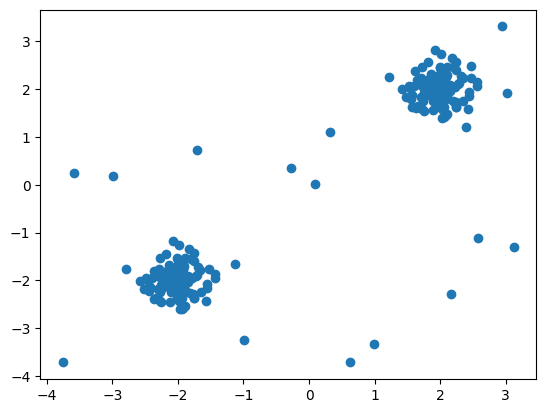

In [12]:
plt.scatter(X[:,0],X[:,1])

In [14]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()

# The negative outlier factor (LOF) scores: Lower scores correspond to points that are more likely to be outliers.
X_scores = clf.negative_outlier_factor_

In [15]:
X_scores

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ,
       -1.04273309, -0.96537973, -1.12978593, -1.04714221, -1.1241528 ,
       -0.97795087, -0.97358493, -1.13261793, -0.98280096, -1.02069094,
       -0.95891097, -1.1491003 , -1.11886905, -0.99855726, -0.99357848,
       -1.13283666, -1.1460512 , -1.87981613, -0.95747372, -1.2240096 ,
       -0.9432555 , -1.25135605, -1.00309851, -1.10715506, -0.97725017,
       -0.99886729, -0.97739557, -1.09329811, -0.99310409, -0.96318902,
       -1.08969429, -0.97382438, -0.94892287, -1.42556212, -0.96379941,
       -1.27724298, -1.46492263, -0.94595752, -1.04083691, -1.1733885 ,
       -1.06562769, -1.29284358, -1.32423841, -1.06358314, -0.96642636,
       -1.08777278, -1.03217634, -1.24655122, -0.97201908, -1.09

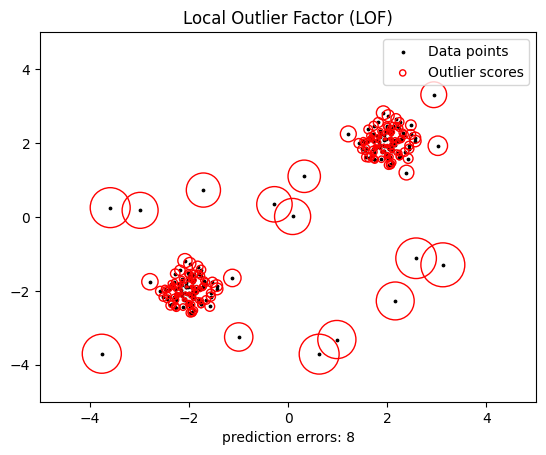

In [16]:

from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()